### <p style="text-align: right;"> &#9989; Mounika Jetti</p>

#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>

# Day 9 In-Class: Cleaning and Analyzing Economic Data




<img src="http://2oqz471sa19h3vbwa53m33yj-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/world-economy-gdp.jpg" width=500px>

## Goals for today's in-class project

- Review some basic statistics
- Load in data and clean Pandas dataframes
- Learn different ways to index Pandas dataframes 
- Analyze different countries GDP data
- Practice using online research to learn new programming skills


---
## A short statistics Review

Today we will start off by reviewing some basic statistical measures.

The "**mean**", or average, of a set of values is calculated by adding up all of the values and dividing that result by the total count. Like so:

- Mean (Average) = Sum of observations / Number of observations

The "**median**" is the value that divides the set of values into two halves or the "middle value". Thought of another way:

- Median = Midpoint of a frequency distribution or the middle value when the values are sorted from low to high

When using the mean or median to analyze or understand the nature of your data, it is important to remember that:
* The mean is very sensitive to outliers in the data. If there are extreme values in your data, the mean may be skewed by those values. 
* The median is some times considered a "resistant statistic"  because a small number of extreme outliers will not significantly alter the median. After all, the median is just a marker for where the "middle" is in the data.
 
To understand how widely spread a distribution of values is, we look at the **variance** and the **standard deviation**:

- Variance: this is the expected value of the squared deviation of a random variable from its average value. In simpler terms, you can think of it as a measure of how "spread out" values in the dataset are. 
    
- Standard Deviation: this is simply the square root of variance. It is a another measurement of the variation or dispersion of a set of values.

**A quick reflection**: As we mentioned above, the mean can be sensitive to the existence of outliers. Look at the example below.

In [1]:
import numpy as np

# Create a list where most of the values are within a similar range, but one is a clear outlier
X = [3,2,1,20,4]

print("The mean is:",np.mean(X))
print("The median is:",np.median(X))

The mean is: 6.0
The median is: 3.0


# Practice calculating statistics using Python

### Computing standard deviation by hand

&#9989;&nbsp; **Create a function** that takes in a list of values and calculates the standard deviation using only basic python functions. You should be able to do it without importing any packages (i.e. no np.std, np.mean etc..)

### $$ \sigma = \sqrt{\frac{\sum\limits_{i=1}^{N} (x_{i}-\mu)^2}{N}} $$

where the symbols in this equation represent the following:

* $\sigma$: Standard Deviation
* $\mu$: Mean
* $N$: Number of observations
* $x_{i}$: the value of dataset at position $i$

In [9]:
# Put your code here
import math
def calculate_standard_deviation(x):
    mean = sum(x)/len(x)
    std = math.sqrt(sum([(i-mean)**2 for i in x])/len(x))
    return std


7.0710678118654755

&#9989;&nbsp; **Check your function for accuracy**

Call your function using the variable `test_list` (provided below) as the input and compare your function's output with that of `np.std()` to make sure you calculated standard deviation correctly.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
test_list = [1,3,5,10,15,5]

# Put your code for comparing the answers here
print(calculate_standard_deviation(test_list))
print(np.std(test_list))

4.681523968396046
4.681523968396046


&#9989;&nbsp; Now, look at the the following distribution of values generated using one of NumPy's built-in functions. **Without computing anything do you think the mean will be greater than, less than, or equal to the median? Explain why below.**

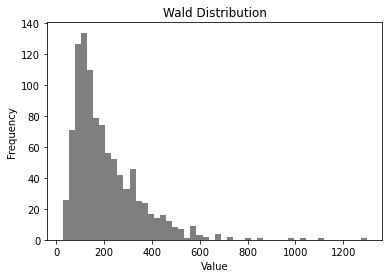

In [12]:
# You might not be familiar this with random number generator, that's OK. This is one of _many_ that are available in NumPy.
import matplotlib.pyplot as plt
random_distribution = np.random.wald(200,500,size=1000)
# Now we make a histogram of the numbers
hist = plt.hist(random_distribution,bins=50,color="k",alpha=0.5) #what's the alpha argument doing?
ylabel = plt.ylabel("Frequency")
xlabel = plt.xlabel("Value")
title = plt.title("Wald Distribution")

<font size=+3>&#9998;</font> *Mean will be greater than median. Since there are less number of outliers and also less number of points are present to the left of the peak, this will cause the median to be a greater value. Not sure how big median will be when compared to mean. But, it should be definitely be higher*

&#9989;&nbsp; **Now lets actually compute the mean and median and visualize them on the distribution graph.**

Add two vertical lines with different colors where the mean and median are using Matplotlib's [`plt.axvline()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html) function -- this might be new to you, so make sure you understand how it works!

**Make sure you label your lines and include a legend.**

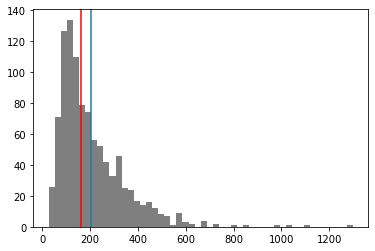

In [16]:
hist = plt.hist(random_distribution,bins=50,color="k",alpha=0.5)
# Add your additional plotting commands here
plt.axvline(np.mean(random_distribution))
plt.axvline(np.median(random_distribution), color='r')

<font size=20px>&#128721;</font>
Check if your answer was correct


&#9989;&nbsp; **Was your prediction correct? Explain why the mean is greater than median in this example.**

<font size=+3>&#9998;</font> *I think my prediction is correct. Since there are less number of outliers and also less number of points are present to the left of the peak, this will cause the median to be a greater value. *

---


# Part 2: Loading in and cleaning economic data

The next part we will focus on transforming and manipulating a dataset using Pandas. As data scientist/computational professional in training, one of the goals we want you to accomplish is to be comfortable searching through online resources to try and solve problems. There are far too many functions and concepts in programming to remember everything so in practice it's essential to utilize package documentation, stack overflow, etc. Some of the questions you will see below will ask you to use or look for a function you've never used before to get you to practice Googling questions that help you accomplish your task.


---

We will be analyzing a dataset from the World Bank containing yearly GDP data for countries from 1960-2018. The GDP numbers have been converted to USD for all countries by the exchange rate at the time. Which is important to note because depending on the exchange rates at the time this could over/under value the non US countries numbers or increase the variance of GDP.

Link to dataset: https://data.worldbank.org/indicator/ny.gdp.mktp.cd

GDP stands for **Gross Domestic Product** and it is equal to the market value of all the finished goods and services produced within a country's borders in a specific time period.

GDP = Consumer Spending + Private Investment + Government Expenditure + Net Exports

---

### Cleaning data is an important part analyzing data.

First, we're going to load in the GDP.csv dataset into a Pandas Dataframe and explore the original structure of the data and think about if it could be formatted in a more useful way.

Make sure you import the Pandas module before moving on!

In [17]:
# put your Pandas import command here
import pandas as pd

&#9989;&nbsp; **Load in the GDP.csv file using `pd.read_csv()` and display the first few lines using `.head()`. Make sure you add the argument `encoding="ISO-8859-1"` to ensure that the data is read in correctly**

Use `gdp` as the variable name for storing your dataframe as indicated in the code cell below.

In [30]:
# Load in GDP.csv
gdp = pd.read_csv("GDP.csv")# Finish this line to load in the data!
gdp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.243909e+10,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.505888e+10
2,Algeria,DZA,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,...,1.370000e+11,1.610000e+11,2.000000e+11,2.090000e+11,2.100000e+11,2.140000e+11,1.660000e+11,1.600000e+11,1.680000e+11,1.810000e+11
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.610000e+08,6.530000e+08,6.340000e+08,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09


**Reflecting on the data:** Typically when we are looking at data over time we represent each time step as a row rather than a column. Let's transpose the dataset to get years as rows. Pandas has a built in transpose function -- see if you can figure out what it is!

Example of Transposing:

<img src="https://www.howtogeek.com/wp-content/uploads/2016/06/00_lead_image_transpose_word_table.png" width=500px>

&#9989;&nbsp; **Transpose the data** to flip the orientation of the rows and columns.

In [31]:
# Transpose the dataframe here and check to see if it worked
gdp = gdp.T
gdp.head()

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Country Code,AFG,ALB,DZA,ASM,AND,AGO,ATG,ARG,ARM,ABW,...,UZB,VUT,VEN,VNM,VIR,PSE,WLD,YEM,ZMB,ZWE
1960,5.37778e+08,NaN,2.72365e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.77909e+09,NaN,NaN,NaN,1.37e+12,NaN,7.13e+08,1.05299e+09
1961,5.48889e+08,NaN,2.43478e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.18909e+09,NaN,NaN,NaN,1.42e+12,NaN,6.96286e+08,1.09665e+09
1962,5.46667e+08,NaN,2.00147e+09,NaN,NaN,NaN,NaN,2.44506e+10,NaN,NaN,...,NaN,NaN,8.94697e+09,NaN,NaN,NaN,1.53e+12,NaN,6.93143e+08,1.1176e+09


One of the benefits of Pandas Dataframe is being able to index a column by name rather than a number.

&#9989;&nbsp; **Modify the dataframe so that each country name is used as the column headers by assigning the first row of the dataframe to be the column headers.**

You may want to use `.iloc` to do this.

If done correctly, you then should be able to index a column out of our dataframe using `gdp['United States']`, for example.

In [32]:
# Change the column headers to be the country names here.
gdp.columns = gdp.iloc[0]
gdp.head()


Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Country Code,AFG,ALB,DZA,ASM,AND,AGO,ATG,ARG,ARM,ABW,...,UZB,VUT,VEN,VNM,VIR,PSE,WLD,YEM,ZMB,ZWE
1960,5.37778e+08,NaN,2.72365e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.77909e+09,NaN,NaN,NaN,1.37e+12,NaN,7.13e+08,1.05299e+09
1961,5.48889e+08,NaN,2.43478e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.18909e+09,NaN,NaN,NaN,1.42e+12,NaN,6.96286e+08,1.09665e+09
1962,5.46667e+08,NaN,2.00147e+09,NaN,NaN,NaN,NaN,2.44506e+10,NaN,NaN,...,NaN,NaN,8.94697e+09,NaN,NaN,NaN,1.53e+12,NaN,6.93143e+08,1.1176e+09


This is looking pretty good!

Of course, now we have couple of redundant rows, "Country Name" and "Country Code". We don't really need these any more now that we've change the column labels.

&#9989;&nbsp; **Remove these two rows, since they don't contain yearly GDP data.** There's more than one way to do this. One option is to use the Pandas `drop()` function. But you can also do this with clever indexing using `iloc`.

**Careful:** Depending on how you do this, if you run a cell that removes the first couple lines and you re-run the cell, you may continue to remove more lines. After you do all of these data frame manipulations, make sure your data starts in 1960. **You may need to restart your notebook and reload the data if something goes wrong.**

In [34]:
# Try to remove the rows that don't represent years here
gdp = gdp.drop(["Country Name","Country Code"])

Now our dataset should be in an easier format. The next step is to examine the structure of our data.

&#9989;&nbsp; **Review the following code and comment what each line is doing.**

In [36]:
print(gdp.index) #Printing all the indexes of the dataframe

print(type(gdp.index[0])) #printing the type of each index of the dataframe

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')
<class 'str'>


We can see the index column is made up of strings representing years, which isn't ideal!

The code below will change the data type from strings to integers. This will be helpful for when we begin plotting because when you try to plot strings as numbers it doesn't usually work out very well!

In [37]:
gdp.index = gdp.index.astype(int)
gdp.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018],
           dtype='int64')

&#9989;&nbsp; **Now pick 2 countries and print the GDP for year 1975 using `.loc` and the column name.**

In [51]:
# Put your code here
print(gdp.loc[1975,['India','China']])


Country Name
India    9.84728e+10
China       1.63e+11
Name: 1975, dtype: object


&#9989;&nbsp; Now, **Plot those two countries GDP *in billions of dollars* from 1960-2018, make sure to have proper labels and legends.**


Text(0, 0.5, 'GDP in billions of dollars')

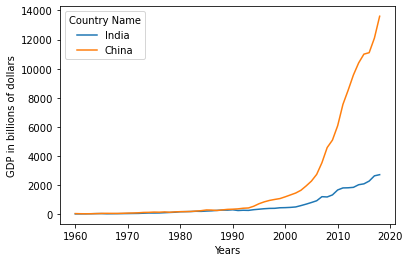

In [56]:
# Put your plotting commands here
ax = gdp[['India','China']].apply(lambda x: x/1000000000).plot()
ax.set_xlabel("Years")
ax.set_ylabel("GDP in billions of dollars")

&#9989;&nbsp; **Question** Is this a good way visual comparison for the two countries? If one country has a much larger GDP or much larger population than the other country what would be a better way to normalize or compare the data? This might involve doing some sort of calculation or visualizing the data differently.

<font size=+3>&#9998;</font> *Applying log to the data might help in reducing the drastic difference while visualizing the data. Apart from this, we can normalize by using a min max scaling. Also, considering the rate of gdp might be a good idea*

### Exploring the log-linear plot

During the COVID-19 pandemic, some of the visualizations floating around that show the numbers of confirmed cases in various places around the world have been "log-linear" plots which uses a logarithmic scale (tick marks indicate powers of 10) on the y-axis and a linear scale on the x-axis. Some folks have even written papers about [how these sort of plots may or may not impact how people perceive the need for confinement](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7200843/) to stop the spread of the virus.

Matplotlib actually makes creating such a plot quite easy with the `semilogy()` function. You can find the documentation for this function [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.semilogy.html).

&#9989;&nbsp; Try using `semilogy()` with the GDP data you just plotted for two different countries to see if it facilitates a better comparison!

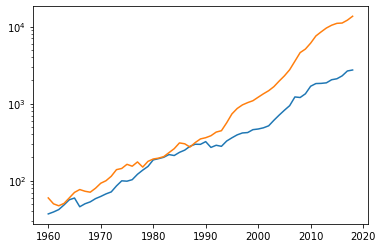

In [61]:
# Try making a "semilogy" plot here
fig = plt.semilogy(gdp[['India','China']].apply(lambda x: x/1000000000))


&#9989;&nbsp; **Question** do you find this to be a better way to visualize the data, yes or no? Explain your reasoning!  


<font size=+3>&#9998;</font> *Yes. It definitely looks like we are doing an apple to apple comparision. But, not sure if this is the correct way. Since, scaling down one means we are taking approximations.*

### Analyzing growth rates

One way to compare GDP between different countries in a way that is unit free would be to consider the countries _growth rates_. The growth rate for a year would be equal to the **percent change** going from one year to another, defined like so:

* Growth Rate in 1961 = (GDP in year 1961 - GDP in year 1960) / GDP in year 1960

&#9989;&nbsp; **Lets plot two countries growth rates on the same plot over time making sure to properly label our graph.**

(Pandas might have a function that can compute the percent change for you -- time to consult the internet again!)

**Try using the Pandas plotting functions for this part: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html**



Text(0, 0.5, 'GDP in billions of dollars')

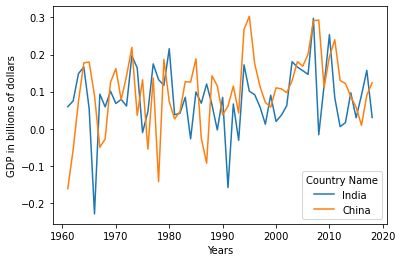

In [66]:
# Calculate and plot the growth rates as a function of time
ax = gdp[['India','China']].pct_change().plot()
ax.set_xlabel("Years")
ax.set_ylabel("GDP in billions of dollars")

&#9989;&nbsp; **Question**: Why might comparing growth rates be a better comparison for countries that have GDP's of very different magnitudes?


<font size=+3>&#9998;</font> *Considering growth rates might tell us whether one country had a better gdp compared to its previous years. This elimiates the problem when we are comparing two countries of different magnitude since, we are comparing each with itself*

---

## Part 3: Data Manipulation (time permitting or if you're interested in exploring the data further on your own time!)
### Filtering, sorting, and calculating new quantities 

Now that you've been able to clean, transform, and visualize the data, but for an extra challenge let's use any time you have remaining to work on filtering and sorting your data.

&#9989;&nbsp; **Filter the top 10% countries by GDP in 2018, print their names, and store the names in a list in ordered by their GDP ranking.**

(Hint Pandas has a `quantile` function that could be useful to find the 10% cut off as well as a function for sorting the values)

**Make sure the names make sense, there might be an entry that doesn't belong and skews your data. If there is a non country entry in the dataset remove that row!**

In [ ]:
# Put your code for finding the countries with the highest 10 GDP values and sorting them here


&#9989;&nbsp; **Let's take a closer look at how the countries rank by plotting a horizontal bar graph of the top 10% countries GDP in billions by ranking order starting with the highest GDP down.**

Pandas has horizontal bar graph function as well -- isn't Pandas handy?

In [ ]:
# Make your horizonal bar graph here


&#9989;&nbsp; **Using that list of the top 10% of countries, create a subset GDP dataframe that has data for only the last 20 years for countries in your list of top 10%.**

We can create a subset by setting a new variable to equal the subset of the Dataframe. 

(something like: Subset = DataFrame[list_of_columns_headers])

Then, **calculate the standard deviation of GDP for each country in the subset dataframe over the last 20 years. Recreate the Horizontal Bargraph above with but using the standard deviation.**

In [ ]:
# Put your code here and create additional code cells as needed


&#9989;&nbsp; **Are there similiarities between the GDP graph and the standard deviation graph? Explain why you think they look similiar and what the limitation is with using standard deviation to compare the variation of the GDP for different contries.**

<font size=+3>&#9998;</font> *Put your answer here*

---

**Let's pause and think about the following example:**

In [ ]:
X = np.array([2,4,10,15,30,50])
print(np.std(X))

X2 = X*50
print(np.std(X2))

The idea here is the spread between the numbers in the datasets `X` & `X2` are the same in when considered as a percentage of the total, but the standard deviation will be proportionally higher for `X2`. This means the difference between each observation and the mean from a percentage basis is the same, but because the values in `X2` are 50 times larger, the standard deviation will be 50 times larger.

The take away is if we want to compare how much a countries GDP growth varies relative to another country, we want an apples to apples comparison. For example, taking the standard deviation of the United States compared to Thailand we would expect United States to have a higher standard deviation because the US GDP is much higher. When in reality, Thailand's GDP varies relatively more than the United States GDP varies.


---

In order to compare the variation in GDP by countries of different magnitudes we want to be looking at the change in GDP from a percentage view.

&#9989;&nbsp; **Recreate the horizontal bar graph again, but this time take the standard deviation of the percent changes, or growth rates, of GDP for the last 20 years.**

In [ ]:
# Put your code here


&#9989;&nbsp; **What do you observe? Why is taking the standard deviation of growth rates a better assessment of volatility than standard deviation of normal GDP for this data?**



<font size=+3>&#9998;</font> *Put your answer here*

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2019,  Michigan State University Board of Trustees

---
